In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import cufflinks as cf
cf.set_config_file(offline=True)


In [2]:
df1 = pdr.get_data_yahoo('AAPL',start='2011-01-01',end='2021-10-31')
df1 = df1[['Open','Close']]
df1 = df1.rename(columns ={'Open': 'Open_AAPL', 'Close':'Close_AAPL'})
df2 = pdr.get_data_yahoo('MSFT','2010-11-01','2021-10-31')
df2 = df2[['Open','Close']]
df2 = df2.rename(columns ={'Open': 'Open_MSFT', 'Close':'Close_MSFT'})
df3 = pdr.get_data_yahoo('AMZN','2010-11-01','2021-10-31')
df3 = df3[['Open','Close']]
df3 = df3.rename(columns ={'Open':'Open_AMZN','Close':'Close_AMZN'})
df4 = pdr.get_data_yahoo('GOOGL','2010-11-01','2021-10-31')
df4 = df4[['Open','Close']]
df4 = df4.rename(columns ={'Open': 'Open_GOOGL', 'Close':'Close_GOOGL'})
df5 =  pdr.get_data_yahoo('HP','2010-11-01','2021-10-31')
df5 = df5[['Open','Close']]
df5 = df5.rename(columns ={'Open': 'Open_HP', 'Close':'Close_HP'})
df = df1.merge(df2, on = 'Date')
df = df.merge(df3, on = 'Date')
df = df.merge(df4, on = 'Date')
df = df.merge(df5, on = 'Date')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_AAPL,Close_AAPL,Open_MSFT,Close_MSFT,Open_AMZN,Close_AMZN,Open_GOOGL,Close_GOOGL,Open_HP,Close_HP
Date,,,,,,,,,,
2011-01-03,11.630000,11.770357,28.049999,27.980000,181.369995,184.220001,298.538544,302.477478,49.099998,49.040001
2011-01-04,11.872857,11.831786,27.940001,28.090000,186.149994,185.009995,303.113098,301.361359,49.290001,48.110001
2011-01-05,11.769643,11.928571,27.900000,28.000000,184.100006,187.419998,300.335327,304.839844,47.779999,49.220001
2011-01-06,11.954286,11.918929,28.040001,28.820000,186.500000,185.860001,305.645660,307.057068,49.259998,48.410000
2011-01-07,11.928214,12.004286,28.639999,28.600000,187.880005,185.490005,308.263275,308.528534,48.419998,48.889999
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,148.679993,148.639999,309.359985,308.130005,3335.000000,3320.370117,2751.000000,2748.939941,34.689999,33.889999
2021-10-26,149.330002,149.320007,311.000000,310.109985,3349.510010,3376.070068,2785.270020,2786.169922,33.880001,33.669998
2021-10-27,149.360001,148.850006,316.000000,323.170013,3388.000000,3392.489990,2788.100098,2924.350098,33.340000,31.770000


In [3]:
three_years = df.loc['2011-01-01': '2013-12-31']
three_years = three_years[['Close_AAPL','Close_MSFT','Close_AMZN','Close_GOOGL','Close_HP']]
three_years['Return_AAPL']= three_years['Close_AAPL'].pct_change()
three_years['Return_MSFT']= three_years['Close_MSFT'].pct_change()
three_years['Return_AMZN']= three_years['Close_AMZN'].pct_change()
three_years['Return_GOOGL']= three_years['Close_GOOGL'].pct_change()
three_years['Return_HP']= three_years['Close_HP'].pct_change()
three_years = three_years[['Return_AAPL','Return_MSFT','Return_AMZN','Return_GOOGL','Return_HP']]
three_years= three_years.dropna()
three_years

,Return_AAPL,Return_MSFT,Return_AMZN,Return_GOOGL,Return_HP
Date,,,,,
2011-01-04,0.005219,0.003931,0.004288,-0.003690,-0.018964
2011-01-05,0.008180,-0.003204,0.013026,0.011543,0.023072
2011-01-06,-0.000808,0.029286,-0.008324,0.007273,-0.016457
2011-01-07,0.007161,-0.007634,-0.001991,0.004792,0.009915
2011-01-10,0.018833,-0.013287,-0.004367,-0.003618,-0.006750
...,...,...,...,...,...
2013-12-24,-0.004245,0.012562,-0.009233,-0.002923,0.018398
2013-12-26,-0.006641,0.009709,0.013001,0.005055,0.001325
2013-12-27,-0.006757,-0.004006,-0.015604,0.000841,0.009863


In [4]:
 matrix_of_return_value = np.asmatrix(three_years)
matrix_of_return_value = matrix_of_return_value.T

no_of_asset_classes = 5
no_of_portfolios = 10000
np.random.seed(123)
collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights

def get_portfolio_statistics(asset_weights, matrix_of_return_value):
    asset_means = np.asmatrix(np.mean(matrix_of_return_value, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_value))
    portfolio_mean= asset_weights * asset_means
    portfolio_mean= portfolio_mean.item()
    portfolio_standard_deviation= np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation= portfolio_standard_deviation.item()
    portfolio_sharpe_ratio= portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio

while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights)
    portfolio_means.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_value)[0])
    portfolio_standard_deviations.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_value)[1])
    portfolio_sharpe_ratios.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_value)[2])
    

    
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
print(collection_of_random_asset_weights[index]) 
print(portfolio_sharpe_ratios[index])

[[0.23511333 0.00143521 0.34855634 0.33882817 0.07606695]]
0.0743331428710408


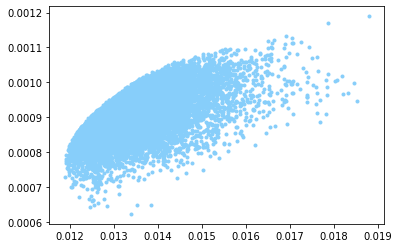

In [5]:
plt.plot(portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

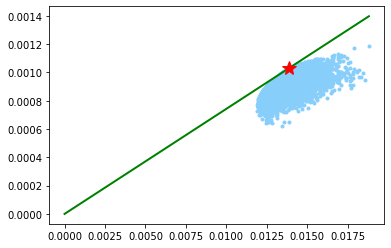

In [6]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot( portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="red",marker="*",markersize = 15)
plt.show()

In [8]:
some_wights= pd.DataFrame({'AAPL': [0.23511333], 'MSFT': [0.00143521], 'AMZN':[0.34855634], 'GOOGL':[0.33882817], 'HP':[0.07606695] }, index = [three_years.last_valid_index()])
some_wights

,AAPL,MSFT,AMZN,GOOGL,HP
2013-12-31,0.235113,0.001435,0.348556,0.338828,0.076067


In [9]:
capital = 10000
allocations = capital*some_wights
allocations

,AAPL,MSFT,AMZN,GOOGL,HP
2013-12-31,2351.1333,14.3521,3485.5634,3388.2817,760.6695


In [10]:
print(df['Close_AAPL'].loc[some_wights.last_valid_index()])
print(df['Close_MSFT'].loc[some_wights.last_valid_index()])
print(df['Close_AMZN'].loc[some_wights.last_valid_index()])
print(df['Close_GOOGL'].loc[some_wights.last_valid_index()])
print(df['Close_HP'].loc[some_wights.last_valid_index()])

no_of_shares = allocations /df[[f'Open_{sym}' for sym in some_wights.columns]].loc[some_wights.index[0]].values
no_of_shares

20.036428451538086
37.40999984741211
398.7900085449219
560.9158935546875
84.08000183105469


,AAPL,MSFT,AMZN,GOOGL,HP
2013-12-31,118.793386,0.383746,8.833604,6.086624,9.046973


In [11]:
seven_years = df.loc['2013-12-31':] 
seven_years['Open'] = seven_years['Open_AAPL']*no_of_shares['AAPL'].iloc[0] + seven_years['Open_MSFT']*no_of_shares['MSFT'].iloc[0] + seven_years['Open_AMZN']*no_of_shares['AMZN'].iloc[0]+ seven_years['Open_GOOGL']*no_of_shares['GOOGL'].iloc[0]+ seven_years['Open_HP']*no_of_shares['HP'].iloc[0]
seven_years['Close'] = seven_years['Close_AAPL']*no_of_shares['AAPL'].iloc[0] + seven_years['Close_MSFT']*no_of_shares['MSFT'].iloc[0]+ seven_years['Close_AMZN']*no_of_shares['AMZN'].iloc[0]+ seven_years['Close_GOOGL']*no_of_shares['GOOGL'].iloc[0]+ seven_years['Close_HP']*no_of_shares['HP'].iloc[0]
seven_years = seven_years[['Open','Close']]
seven_years

,Open,Close
Date,,
2013-12-31,10000.000000,10092.057783
2014-01-02,10052.297850,10011.566274
2014-01-03,10022.066030,9928.908250
2014-01-06,9928.755819,9943.881751
2014-01-07,9976.850557,10046.718393
...,...,...
2021-10-25,64299.127105,64144.893200
2021-10-26,64706.409619,64943.079318
2021-10-27,65064.237590,65861.166640


Abslute Return of Our Portofolio:560.16%
CAGR of Our Portofolio: 174.50%
Information Ratio of Our Portofolio:1.12



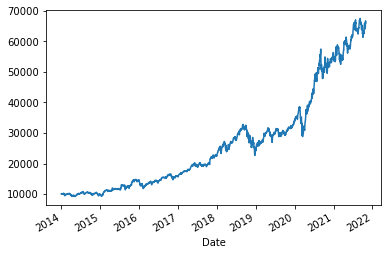

In [12]:
absolute_return = (seven_years['Close'].iloc[-1]-capital)/capital
CAGR = ((seven_years['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio = (seven_years.Close.pct_change().mean()/seven_years.Close.pct_change().std())*((252) **0.5)


s=f"""Abslute Return of Our Portofolio:{absolute_return*100:.2f}%
CAGR of Our Portofolio: {CAGR*100:.2f}%
Information Ratio of Our Portofolio:{information_ratio:.2f}
"""
print(s)
axs = seven_years.Close.plot()

In [13]:
short_time = 5
long_time = 15
seven_years['Close_Short_Rolling']= seven_years['Close'].rolling(window = short_time).mean()
seven_years['Close_Long_Rolling']= seven_years['Close'].rolling(window = long_time).mean()
seven_years['Window_diff']=seven_years['Close_Long_Rolling'] - seven_years['Close_Short_Rolling']
seven_years['Open_1_change'] = seven_years['Open']-seven_years['Open'].shift(1)
seven_years = seven_years.dropna()
seven_years

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,Window_diff,Open_1_change
Date,,,,,,
2014-01-22,10299.040502,10273.198387,10192.036580,10078.413825,-113.622755,110.671710
2014-01-23,10215.873426,10229.039673,10209.114034,10087.545951,-121.568083,-83.167076
2014-01-24,10173.727435,9956.517817,10169.972142,10083.876054,-86.096088,-42.145991
2014-01-27,10007.762600,9892.695379,10124.988276,10081.461863,-43.526414,-165.964835
2014-01-28,9754.042378,9849.432021,10040.176655,10075.165214,34.988558,-253.720222
...,...,...,...,...,...,...
2021-10-25,64299.127105,64144.893200,65160.610855,64034.609894,-1126.000961,-1071.043788
2021-10-26,64706.409619,64943.079318,64956.291370,64219.602502,-736.688868,407.282515
2021-10-27,65064.237590,65861.166640,65010.563576,64422.494723,-588.068852,357.827971


In [14]:
X = seven_years.copy()
y = np.where(X.Close.shift(-1) >= X.Close, 1,-1)
index = int(0.3*len(X))
X_train = X.iloc[:index]
X_test = X.iloc[index:]
y_train = y[:index]
y_test = y[index:]
logistic = LogisticRegression()
logistic = logistic.fit(X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))

,0,1
0,Open,[-0.0008000263037710934]
1,Close,[-5.101626526322349e-05]
2,Close_Short_Rolling,[0.00045815978513170274]
3,Close_Long_Rolling,[0.00040958877282001947]
4,Window_diff,[-4.8571012311593036e-05]
5,Open_1_change,[0.0008469472975732514]


In [15]:
predictions = logistic.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(logistic.score(X_test,y_test))

[[ 58 525]
 [ 71 718]]
0.565597667638484


In [16]:
results = X_test.copy()
results['C2C_Price']= X_test.Close.shift(-1) - X_test.Close
results['Predictions'] = predictions
results['True_Label']= y_test
results['Return']= results['C2C_Price']*results['Predictions']
results['Cum_Return']= results['Return'].cumsum()
results = results.dropna()
results

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,Window_diff,Open_1_change,C2C_Price,Predictions,True_Label,Return,Cum_Return
Date,,,,,,,,,,,
2016-05-20,13905.292231,13980.388666,13935.563470,13843.868583,-91.694887,74.874973,-49.856974,1,-1,-49.856974,-49.856974
2016-05-23,13996.716423,13930.531692,13908.174325,13855.237964,-52.936360,91.424191,208.555499,1,1,208.555499,158.698525
2016-05-24,13978.853827,14139.087191,13963.307218,13888.110987,-75.196232,-17.862596,135.539488,1,1,135.539488,294.238013
2016-05-25,14214.062889,14274.626679,14037.109871,13932.031340,-105.078531,235.209063,76.371889,1,1,76.371889,370.609902
2016-05-26,14269.981815,14350.998568,14135.126559,13988.485768,-146.640791,55.918926,39.470159,1,1,39.470159,410.080061
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,65370.170893,64301.769716,65464.666196,63848.847485,-1615.818711,-157.211280,-156.876516,1,-1,-156.876516,55153.543383
2021-10-25,64299.127105,64144.893200,65160.610855,64034.609894,-1126.000961,-1071.043788,798.186118,1,1,798.186118,55951.729502
2021-10-26,64706.409619,64943.079318,64956.291370,64219.602502,-736.688868,407.282515,918.087322,1,1,918.087322,56869.816824


Abslute Return of Our Algorithmic Trading:567.40%
Abslute Return of Our buy-and-hold Trading :379.96%
CAGR of Our Algorithmic Trading: 174.83%
CAGR of Our buy-and-hold Trading: 15.60%
Information Ratio of Our Algorithmic Trading:1.28
Information Ratio of Our buy-and-hold Trading:1.28



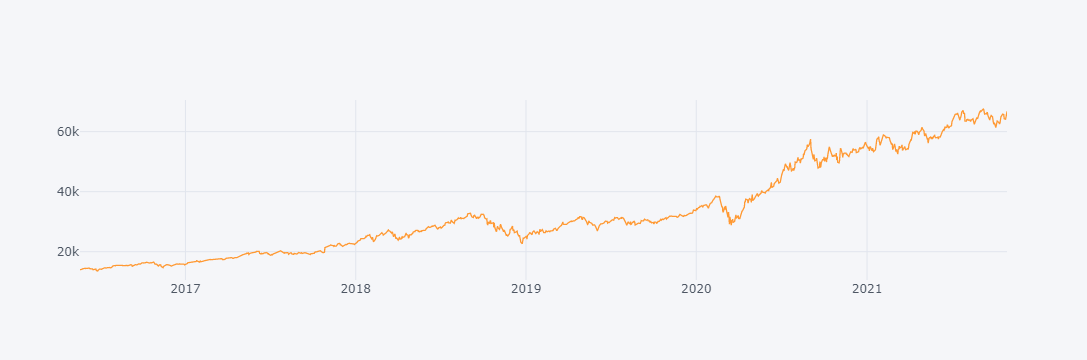

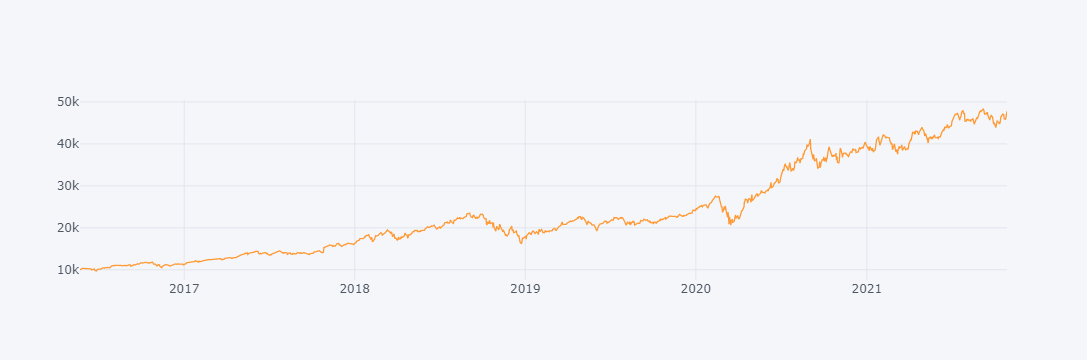

In [17]:
absolute_return_tf = (results['Close'].iloc[-1]-capital)/capital
CAGR_tf = ((results['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio_tf = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)



absolute_return_bh = (results.Close.iloc[-1]-results.Open.iloc[0])/results.Open.iloc[0]
CAGR_bh = ((results.Close.iloc[-1]/results.Open.iloc[0])**(252/len(df)))-1
information_ratio_bh = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)




s=f"""Abslute Return of Our Algorithmic Trading:{absolute_return_tf*100:.2f}%
Abslute Return of Our buy-and-hold Trading :{absolute_return_bh*100:.2f}%
CAGR of Our Algorithmic Trading: {CAGR_tf*100:.2f}%
CAGR of Our buy-and-hold Trading: {CAGR_bh*100:.2f}%
Information Ratio of Our Algorithmic Trading:{information_ratio_tf:.2f}
Information Ratio of Our buy-and-hold Trading:{information_ratio_bh:.2f}
"""

print(s)
results.Close.iplot()

((results.Close.pct_change().dropna()+1).cumprod()*capital).iplot()